In [74]:
import numpy as np
from matplotlib.animation import FuncAnimation
%matplotlib inline
import matplotlib.pyplot as plt

In [73]:
class Kmeans():
    def __init__(self, k=3):
        self.k = k
    
    def initialize_centroids(self,sample):
        temp_sample = sample.copy()
        np.random.shuffle(temp_sample)
        return temp_sample[:self.k]

    def labeling(self,sample):
        temp_sample = np.repeat(sample,self.k,0).reshape(sample.shape[0],self.k,sample.shape[1])
        labels = np.argmin(np.sum((temp_sample-self.centroids)**2,2),1)
        return labels

    def update_centroids(self,sample, labels):
        new_centroids = np.zeros((self.k,sample.shape[1]))
        for i in range(self.k):
            temp_sample = sample[labels==i]
            new_centroids[i,:] = np.mean(sample[labels==i],0)
        return new_centroids

    def train(self,sample):
        self.centroids = self.initialize_centroids(sample)
        self.labels = self.labeling(sample)
        old_lab = np.zeros_like(self.labels)

        while (self.labels != old_lab).any():
            old_lab = self.labels
            self.centroids = self.update_centroids(sample,old_lab)
            self.labels = self.labeling(sample)
                    
#         if Animate:
#             fig, ax = plt.subplots()
#             ani = FuncAnimation(fig, self.Animator, fargs=(sample,), frames=100, interval=100, repeat=False)
#             plt.show()
#             ani.save("animate.gif",writer='imagegick')
    
#     # create a gif        
#     def Animator(self, i, sample):
#         old_lab = self.labels
#         self.centroids = self.update_centroids(sample, old_lab)
#         self.labels = self.labeling(sample)

#         ax.clear()
#         ax.scatter(sample[:, 0], sample[:, 1], c=self.labels, cmap='viridis', label='Points')
#         ax.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='X', s=150, color='red', label='Centroids')
#         ax.set_title(f'K-Means Clustering - Iteration {i + 1}')
#         ax.set_xlabel('X-axis')
#         ax.set_ylabel('Y-axis')
#         ax.legend()
        
#         converged = np.array_equal(self.labels, old_lab)
#         if converged:
#             ani.event_source.stop()
def Kmplot(sample,centroids,label):
    plt.scatter(sample[:, 0], sample[:, 1], c=label, cmap='viridis', label='Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=150, color='red', label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    
    plt.show()

In [50]:
sample = np.vstack(((np.random.randn(50, 2) * 0.5 + np.array([1, 1])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-1, -1])),
                  (np.random.randn(50, 2) * 0.5 + np.array([1, -1]))))

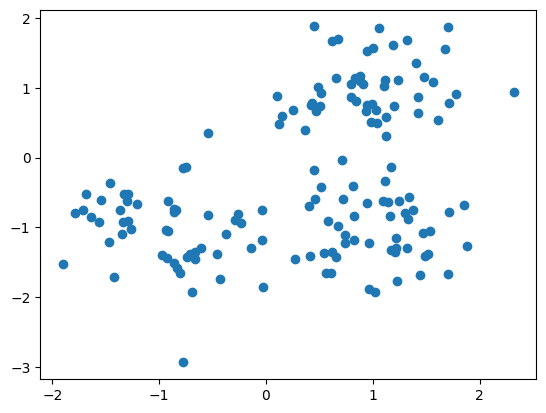

In [51]:
plt.scatter(sample[:, 0], sample[:, 1])
ax = plt.gca()

In [61]:
# K = 3
Km = Kmeans(3)

In [62]:
Km.train(sample)

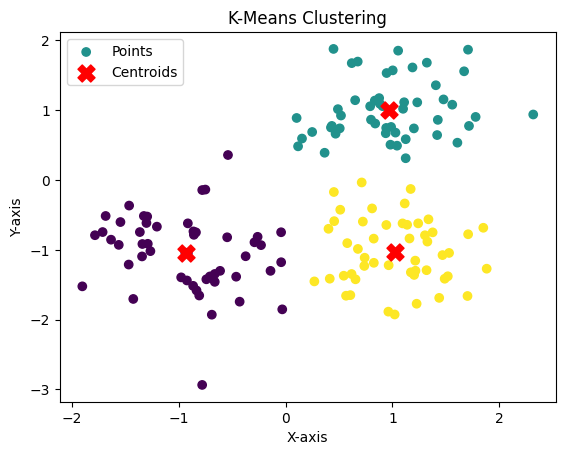

In [69]:
Kmplot(sample,Km.centroids,Km.labels)

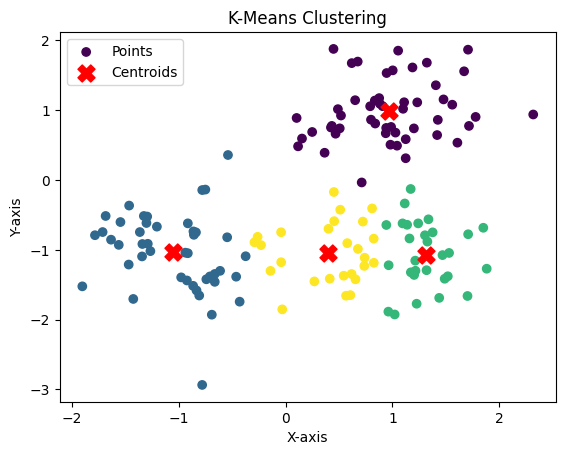

In [71]:
#k = 4
Km = Kmeans(4)
Km.train(sample)
Kmplot(sample,Km.centroids,Km.labels)

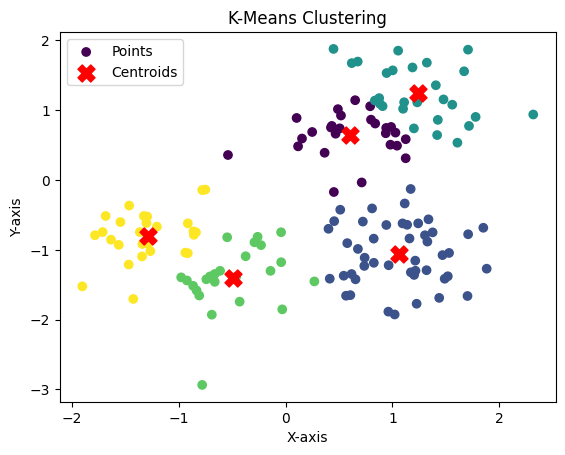

In [72]:
#k = 4
Km = Kmeans(5)
Km.train(sample)
Kmplot(sample,Km.centroids,Km.labels)

In [ ]:
# Scratch
k=3
temp_sample = sample.copy()
np.random.shuffle(temp_sample)
init_centroids = temp_sample[:k]
init_centroids

In [ ]:
# calculate dist
temp_sample = np.repeat(sample,k,0).reshape(sample.shape[0],k,2)
labels = np.argmin(np.sum((temp_sample-init_centroids)**2,2),1)
labels

In [ ]:
# new centroids
new_centroids = np.zeros((k,sample.shape[1]))
for i in range(k):
    temp_sample = sample[labels==i]
    new_centroids[i,:] = np.mean(sample[labels==i],0)

In [ ]:
new_centroids

In [ ]:
def initialize_centroids(sample,k):
    temp_sample = sample.copy()
    np.random.shuffle(temp_sample)
    return temp_sample[:k]

def labeling(sample, k, centroids):
    temp_sample = np.repeat(sample,k,0).reshape(sample.shape[0],k,sample.shape[1])
    labels = np.argmin(np.sum((temp_sample-centroids)**2,2),1)
    return labels

def update_centroids(sample, k, labels):
    new_centroids = np.zeros((k,sample.shape[1]))
    for i in range(k):
        temp_sample = sample[labels==i]
        new_centroids[i,:] = np.mean(sample[labels==i],0)
    return new_centroids

def train(sample, k):
    init_centroids = initialize_centroids(sample,k)
    labels = labeling(sample,k,init_centroids)
    old_lab = np.zeros_like(labels)
    
    while (labels != old_lab).any():
        old_lab = labels
        centroids = update_centroids(sample,k,old_lab)
        labels = labeling(sample, k, centroids)
    plt.show()
    return labels,centroids

In [ ]:
final_label,final_centroids = train(sample,3)

In [ ]:
final_label

In [ ]:
plt.scatter(sample[:, 0], sample[:, 1], c=final_label, cmap='viridis', label='Points')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='X', s=150, color='red', label='Centroids')